In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from aptos.data_loader import SamplerFactory

In [3]:
df = pd.read_csv('../data/preprocessed/train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [12]:
candidate_idx = df.index.values
batch_size = 32
n_batches = 5
alpha = 0.5
sampler = SamplerFactory().get(df, candidate_idx, batch_size, n_batches, alpha)

In [17]:
def class_of_idx(idx):
    return df['diagnosis'][idx]

def class_of_idxs(idxs):
    return [class_of_idx(idx) for idx in idxs]

def class_counts(classes):
    return {c: classes.count(c) for c in range(5)}

In [19]:
for idxs in sampler:
    classes = class_of_idxs(idxs)
    print(classes, class_counts(classes))

[0, 0, 2, 0, 3, 1, 1, 0, 1, 0, 0, 3, 3, 3, 4, 2, 1, 2, 4, 0, 4, 2, 0, 2, 2, 2, 0, 0, 0, 4, 1, 2] {0: 11, 1: 5, 2: 8, 3: 4, 4: 4}
[0, 1, 0, 3, 4, 2, 2, 0, 3, 0, 0, 4, 1, 2, 1, 1, 4, 2, 1, 2, 3, 0, 2, 4, 2, 0, 0, 0, 0, 0, 2, 3] {0: 11, 1: 5, 2: 8, 3: 4, 4: 4}
[2, 4, 1, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 0, 1, 4, 4, 0, 3, 2, 2, 4, 0, 1, 0, 0, 1, 0, 3, 3, 1, 2] {0: 11, 1: 5, 2: 8, 3: 4, 4: 4}
[4, 0, 1, 4, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 4, 0, 4, 3, 2, 0, 0] {0: 11, 1: 5, 2: 8, 3: 4, 4: 4}
[0, 0, 1, 0, 2, 2, 0, 1, 1, 4, 3, 3, 0, 0, 3, 0, 0, 1, 2, 2, 4, 0, 4, 4, 2, 2, 0, 0, 2, 2, 1, 3] {0: 11, 1: 5, 2: 8, 3: 4, 4: 4}


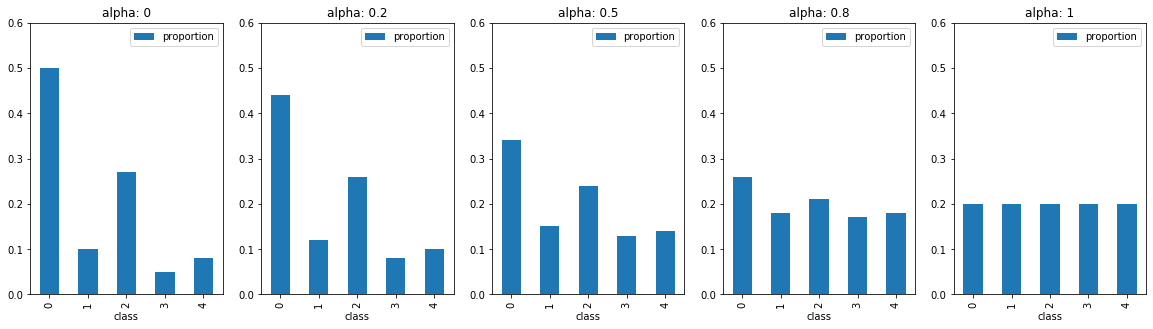

In [55]:
batch_size = 100
n_batches = 5
alphas = [0, 0.2, 0.5, 0.8, 1]

fig, axs = plt.subplots(1, len(alphas), figsize=(20, 5))

for i, alpha in enumerate(alphas):
    sampler = SamplerFactory().get(df, candidate_idx, batch_size, n_batches, alpha)

    for idxs in sampler:
        classes = class_of_idxs(idxs)
        counts = class_counts(classes)
        break

    df_dist = pd.DataFrame({
        'class': list(range(5)), 
        'proportion': [counts[c] / batch_size for c in range(5)]
    }).set_index('class')

    df_dist.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'alpha: {alpha}')
    axs[i].set_ylim(0, 0.6)

plt.savefig('../resources/sample-distributions-20190-data.png')
plt.show()